**Predicting conversion of revenue based on customer’s activity**

The dataset has 12330 unique sessions over a period of 12 months that can be used to predict the behaviour of customers on the website. The target variable is imbalanced with a proportion of majority class (True) being 84.5% and False being 15.5%. The dataset has parameters of google analytics that can be used to predict the revenue generated by customers.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('/content/online_shoppers_intention')

In [ ]:
data.shape

(12330, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
#For checking null entries
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
data['Revenue'] = data['Revenue'].astype(int)
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
data['Weekend'] = data['Weekend'].astype(int)
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [ ]:
data = pd.get_dummies(data = data, columns=['Month', 'VisitorType'], drop_first=True)
data.shape

(12330, 27)

In [ ]:
x = data.drop(columns='Revenue')
y = data['Revenue']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)
X_train=xTrain
Y_train=yTrain
X_test=xTest
Y_test=yTest
Y_train=yTrain

In [ ]:
#creating list to store all machine learning algorithms
classification_models = {}

KNN

Best k is 10 with score 0.868816651571057
The time of execution of above program is : 22.61501431465149
Accuracy score :  85.40145985401459


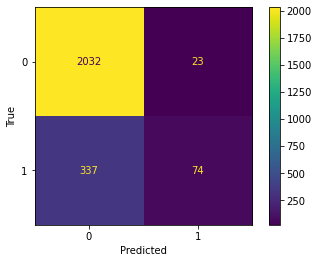

Accuracy: 0.854
Precision: 0.763
Recall: 0.180
F1 Score: 0.291
Sensitivity: 0.180
Specifity: 0.989
Error Rate: 0.146
TPR: 0.180
FPR: 0.011
AUC: 0.584


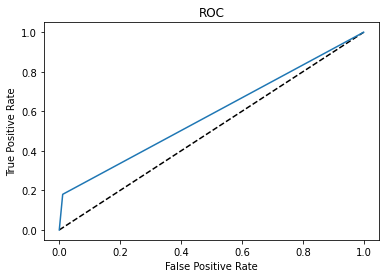

In [ ]:
# record start time
start = time.time()


# to find the best k 
score = 0
scores, highscore, bestk = 0, 0, 0

for k in range(3,12):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train)
    score = scores.mean()
    if score>highscore:
        highscore = score
        bestk = k
print('Best k is {} with score {}'.format(bestk, highscore))

knn = KNeighborsClassifier(n_neighbors=bestk)
knn.fit(X_train,Y_train)
# prediction 
y_predict = knn.predict(X_test)

# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)

knn_accuracy = accuracy_score(Y_test,y_predict)*100
print('Accuracy score : ', knn_accuracy)


classification_models["KNN"] = knn_accuracy
# prediction visualization
cm = confusion_matrix(Y_test,y_predict)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(Y_test, y_predict)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Decision Tree Classifier

The time of execution of above program is : 0.07346367835998535
Accuracy score :  85.6853203568532


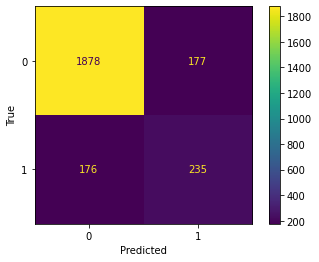

Accuracy: 0.857
Precision: 0.570
Recall: 0.572
F1 Score: 0.571
Sensitivity: 0.572
Specifity: 0.914
Error Rate: 0.143
TPR: 0.572
FPR: 0.086
AUC: 0.743


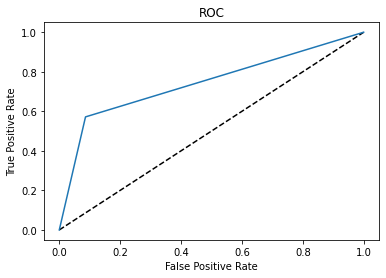

In [ ]:
# record start time
start = time.time()



tree_ = DecisionTreeClassifier()
tree_.fit(X_train,Y_train)
Y_pred = tree_.predict(X_test)


# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)



dt_accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy score : ', dt_accuracy)

classification_models["Decision Tree Classifier"] = dt_accuracy
# prediction visualization
cm = confusion_matrix(Y_test,Y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

SVM

The time of execution of above program is : 3.1420516967773438
Accuracy score :  83.4955393349554


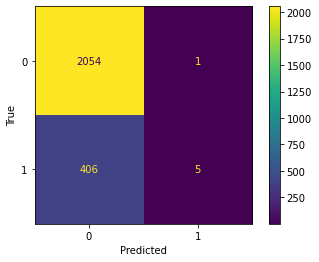

Accuracy: 0.835
Precision: 0.833
Recall: 0.012
F1 Score: 0.024
Sensitivity: 0.012
Specifity: 1.000
Error Rate: 0.165
TPR: 0.012
FPR: 0.000
AUC: 0.506


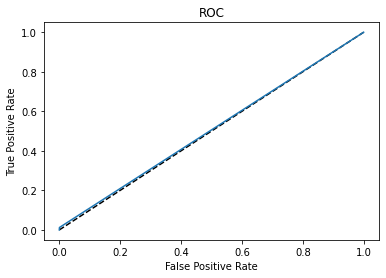

In [ ]:
# record start time
start = time.time()

model = SVC()
model.fit(X_train, Y_train)
Y_preds = model.predict(X_test)

# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


svm_accuracy = accuracy_score(Y_test, Y_preds)*100
print('Accuracy score : ',svm_accuracy)

classification_models["SVM"] = svm_accuracy
# prediction visualization
cm = confusion_matrix(Y_test,Y_preds)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(Y_test, Y_preds)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Naive Bayes 

The time of execution of above program is : 0.0165708065032959
Accuracy score :  80.21086780210868


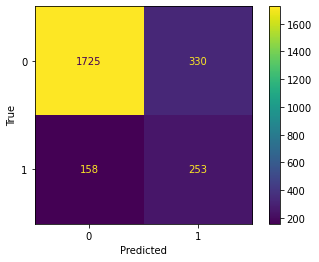

Accuracy: 0.802
Precision: 0.434
Recall: 0.616
F1 Score: 0.509
Sensitivity: 0.616
Specifity: 0.839
Error Rate: 0.198
TPR: 0.616
FPR: 0.161
AUC: 0.727


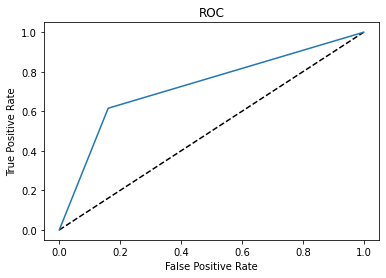

In [ ]:
# record start time
start = time.time()


 
model = GaussianNB()  
model.fit(X_train, Y_train)
Y_predn = model.predict(X_test)

# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


nb_accuracy = accuracy_score(Y_test, Y_predn)*100
print('Accuracy score : ',nb_accuracy)

classification_models["Naive Bayes"] = nb_accuracy
# prediction visualization
cm = confusion_matrix(Y_test,Y_predn)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(Y_test, Y_predn)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Comparing all models

In [ ]:
classification_models = list(classification_models.items())

In [ ]:
for alg,accuracy in classification_models:
    print(" The Accuracy of " + alg + " is " + str(accuracy))

 The Accuracy of KNN is 85.40145985401459
 The Accuracy of Decision Tree Classifier is 85.6853203568532
 The Accuracy of SVM is 83.4955393349554
 The Accuracy of Naive Bayes is 80.21086780210868
